In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import re

In [2]:
data = pd.read_csv('data/chicago-food-inspections/food-inspections.csv')

## 1. Exploring columns

In [3]:
# Drop columns that only contain NaNs
data.drop(columns = ['Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards'], inplace = True)
print('The dataset has size: ', data.shape)
data.head()

The dataset has size:  (194784, 17)


,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2320260,GOPUFF,GOPUFF,2684560.0,Grocery Store,Risk 3 (Low),1801 W WARNER AVE,CHICAGO,IL,60613.0,2019-10-22T00:00:00.000,License,Fail,NaN,41.956846,-87.674395,"{'longitude': '41.956845683288854', 'latitude'..."
1,2320248,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313942.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,NaN,41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
2,2320245,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313945.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
3,2320269,LA CHAPARRITA,LA CHAPARRITA,2689521.0,Mobile Food Preparer,Risk 2 (Medium),2300 S THROOP ST,CHICAGO,IL,60608.0,2019-10-22T00:00:00.000,License Re-Inspection,Pass,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.850451,-87.658798,"{'longitude': '41.85045102427', 'latitude': '-..."
4,2320232,WALGREENS #10771,WALGREENS #10771,1898193.0,Grocery Store,Risk 3 (Low),6460 W FULLERTON AVE,CHICAGO,IL,60707.0,2019-10-22T00:00:00.000,Canvass,Out of Business,NaN,41.923769,-87.787626,"{'longitude': '41.92376935343716', 'latitude':..."


In [4]:
data['Results'].value_counts()

Pass                    105507
Fail                     37655
Pass w/ Conditions       26738
Out of Business          16776
No Entry                  6187
Not Ready                 1854
Business Not Located        67
Name: Results, dtype: int64

We can see that some buisnesses were closed or not found. Since these inspection did not really happen we remove them.

In [5]:
data = data[(data['Results'] != 'Out of Business') & (data['Results'] != 'Business Not Located')]
data = data[(data['License #'] != 0)]

## 2. Facility inspection

We only want to select inspections on facilities that prepare the food themselves. That is, we want to exclude grocery stores, gas stations, schools, etc. 

In [6]:
pd.set_option('display.max_rows', None)
data['Facility Type'].value_counts()

Restaurant                                         120806
Grocery Store                                       22617
School                                              11739
Children's Services Facility                         2918
Bakery                                               2624
Daycare (2 - 6 Years)                                2456
Daycare Above and Under 2 Years                      2230
Long Term Care                                       1277
Catering                                             1079
Mobile Food Dispenser                                 815
Liquor                                                812
Daycare Combo 1586                                    661
Mobile Food Preparer                                  600
Golden Diner                                          535
Hospital                                              519
Wholesale                                             503
TAVERN                                                267
Daycare (Under

Restaurant, cafe, tavern/bar, ice-cream, deli, bakery, dessert, hot dog, juice, sushi. 
The main reason to go to the facility is to eat, nothing else.

In [7]:
# make all the facilities with "restaurant" a restaurant etc.

#initializing the regex 
REST = "rest|diner|sushi|taqueria|hot.dog|grill|cuisine|jap.nese|sandwich|bbq|pizza|burrito|mcdo|mc do|kimchee|chicken|pollo|fish|pasta|taco|rice|fast.food|bagel|noodle|sub|pita|kebab|kabob|seafood|shrimp|thai|african|chinese|burger|porkchop|wendy"
BAR = "bar|hooka|bistro|brewery"
TAVERN = "tavern"
COFFEE = "cafe|caffe|coffee"
DESSERT = "gelato|ice.cream|paleteria|dessert|cand.|chocolate|cookies|cake|patisserie|sweet"
BAKERY = "bakery|donut"
DRINKS = "shake|juice|smoothie|tea"
SNACK = "snack|snak|popcorn"
DELI = "deli"

#make a for loop? - here we are initializing the searches
no_facility = data['Facility Type'].isnull() 
facility_rest = data['Facility Type'].str.contains(pat = REST, case=False, regex=True, na=False)
dba_rest = data['DBA Name'].str.contains(pat = REST, case = False, regex = True, na=False)
facility_bar = data['Facility Type'].str.contains(pat = BAR, case=False, regex=True, na=False)
dba_bar = data['DBA Name'].str.contains(pat = BAR, case = False, regex = True, na=False)
facility_tavern = data['Facility Type'].str.contains(pat = TAVERN, case=False, regex=True, na=False)
dba_tavern =  data['DBA Name'].str.contains(pat = TAVERN, case = False, regex = True, na=False)
facility_coffee = data['Facility Type'].str.contains(pat = COFFEE, case=False, regex=True, na=False)
dba_coffee = data['DBA Name'].str.contains(pat = COFFEE, case = False, regex = True, na=False)
facility_dessert = data['Facility Type'].str.contains(pat = DESSERT, case=False, regex=True, na=False)
dba_dessert = data['DBA Name'].str.contains(pat = DESSERT, case = False, regex = True, na=False)
facility_bakery = data['Facility Type'].str.contains(pat = BAKERY, case=False, regex=True, na=False)
dba_bakery = data['DBA Name'].str.contains(pat = BAKERY, case = False, regex = True, na=False)
facility_drinks = data['Facility Type'].str.contains(pat = DRINKS, case=False, regex=True, na=False)
dba_drinks = data['DBA Name'].str.contains(pat = DRINKS, case = False, regex = True, na=False)
facility_snack = data['Facility Type'].str.contains(pat = SNACK, case=False, regex=True, na=False)
dba_snack = data['DBA Name'].str.contains(pat = SNACK, case = False, regex = True, na=False)
facility_deli = data['Facility Type'].str.contains(pat = DELI, case=False, regex=True, na=False)
dba_deli =  data['DBA Name'].str.contains(pat = DELI, case = False, regex = True, na=False)

In [8]:
#ex. : finding the data that has restaurant as facility name, or if there is no value in the Facility column, checking with the DBA Name
#by going through the dba names and checking the name (no defined facility type), we avoid losing 4781 rows, instead we only lose 2948.
data.loc[facility_rest|(no_facility & dba_rest), 'Facility Type'] = 'Restaurant'
data.loc[facility_bar|(no_facility & dba_bar), 'Facility Type'] = 'Bar'
data.loc[facility_tavern|(no_facility & dba_tavern), 'Facility Type'] = 'Tavern'
data.loc[facility_coffee|(no_facility & dba_coffee), 'Facility Type'] = 'Cafe'
data.loc[facility_dessert|(no_facility & dba_dessert), 'Facility Type'] = 'Desserts'
data.loc[facility_bakery|(no_facility & dba_bakery), 'Facility Type'] = 'Bakery'
data.loc[facility_drinks|(no_facility & dba_drinks), 'Facility Type'] = 'Drinks'
data.loc[facility_snack|(no_facility & dba_snack), 'Facility Type'] = 'Snack'
data.loc[facility_deli|(no_facility & dba_deli), 'Facility Type'] = 'Deli'
data.sample(5)

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
71125,1746220,CHECKERS #6369,CHECKERS #6369,2327823.0,Restaurant,Risk 2 (Medium),6705 S HALSTED ST,CHICAGO,IL,60621.0,2016-03-23T00:00:00.000,Complaint,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.772271,-87.644446,"{'longitude': '41.77227131013158', 'latitude':..."
149757,1235230,TANOSHII LLC,TANOSHII,1544076.0,Restaurant,Risk 1 (High),5547 N CLARK ST,CHICAGO,IL,60640.0,2012-06-11T00:00:00.000,Canvass,No Entry,NaN,41.983099,-87.668524,"{'longitude': '41.98309881120602', 'latitude':..."
62254,1948975,LONG TUNG CHINESE KITCHEN,LONG TUNG CHINESE KITCHEN,1985572.0,Restaurant,Risk 1 (High),6237 S HALSTED PKWY,CHICAGO,IL,60621.0,2016-08-08T00:00:00.000,Complaint,Pass w/ Conditions,3. POTENTIALLY HAZARDOUS FOOD MEETS TEMPERATUR...,NaN,NaN,NaN
114537,1092869,BUENA VISTA RESTAURANT,BUENA VISTA RESTAURANT,1492643.0,Restaurant,Risk 1 (High),3147 N BROADWAY,CHICAGO,IL,60657.0,2014-03-17T00:00:00.000,Canvass,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.939058,-87.644219,"{'longitude': '41.93905792622148', 'latitude':..."
105165,1372635,RUSSIAN TEA TIME,RUSSIAN TEA TIME,32843.0,Restaurant,Risk 1 (High),77 E ADAMS ST,CHICAGO,IL,60603.0,2014-08-19T00:00:00.000,Canvass Re-Inspection,Pass,36. LIGHTING: REQUIRED MINIMUM FOOT-CANDLES OF...,41.879436,-87.624854,"{'longitude': '41.879436242790305', 'latitude'..."


In [9]:
print('Before dropping any of the rows: ', data.shape[0])
data.dropna(axis = 0, subset = ['Facility Type'], inplace = True)
print('After dropping the empty Facility Type rows: ', data.shape[0])
index_names = data[(data['Facility Type'] != 'Restaurant') & (data['Facility Type'] != 'Bar') & (data['Facility Type'] != 'Tavern') & (data['Facility Type'] != 'Cafe') & (data['Facility Type'] != 'Desserts') & (data['Facility Type'] != 'Bakery') & (data['Facility Type'] != 'Drinks') & (data['Facility Type'] != 'Snack') & (data['Facility Type'] != 'Deli')].index
data.drop(index_names, inplace = True)
print('After keeping the Facility Types of interest: ', data.shape[0])

Before dropping any of the rows:  177484
After dropping the empty Facility Type rows:  176995
After keeping the Facility Types of interest:  126023


In [10]:
data['Facility Type'].value_counts()

Restaurant    122301
Bakery          2681
Tavern           332
Desserts         245
Cafe             209
Bar              141
Drinks            71
Deli              34
Snack              9
Name: Facility Type, dtype: int64

## 3. Removing wrong/missing locations

Removing the bad latitude and longitude (outliers). We will consider Chicago to have:
* Longitude: ranging from min. -88.0, max. -87.5
* Latitude: ranging from min. 41.5, max. 42.5


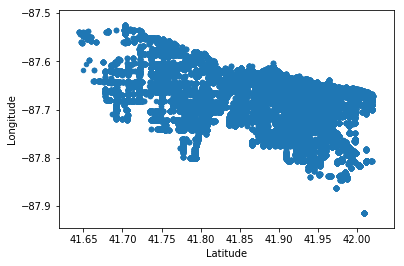

In [11]:
data.plot.scatter(x = 'Latitude', y ='Longitude')
plt.show()

This scatter plot shows that all of the data does seem to really be in Chicago.

In [12]:
no_location = data[data['Latitude'].isnull() & data['Longitude'].isnull()]
print('The number of rows without latitude, longitude: ', no_location.shape[0])
print('There are no rows that don\'t have one of either latitude, longitude and address.')
print('The address, however, is insufficient, and thus all samples without latitude & longitude will be removed.')

The number of rows without latitude, longitude:  185
There are no rows that don't have one of either latitude, longitude and address.
The address, however, is insufficient, and thus all samples without latitude & longitude will be removed.


In [13]:
LONGITUDE_MIN = -88.0
LONGITUDE_MAX = -87.5
LATITUDE_MIN = 41.5
LATITUDE_MAX = 42.2
print('Size before looking at latitude and longitude: ', data.shape[0])
data = data.loc[(data['Longitude'] > LONGITUDE_MIN) & (data['Longitude'] < LONGITUDE_MAX) & (data['Latitude'] > LATITUDE_MIN) & (data['Latitude'] < LATITUDE_MAX)]
print('Size after looking at latitude and longitude: ', data.shape[0])

Size before looking at latitude and longitude:  126023
Size after looking at latitude and longitude:  125838


## 4. Put all the restaurants together in a new dataframe 

So we can see the evolution. Also, it will be useful for the queries.
Get an ID: primary keys so we can index the different restaurants. 

In [14]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
1,2320248,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313942.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,NaN,41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
2,2320245,THE REDHEAD PIANO BAR,THE REDHEAD PIANO BAR,2313945.0,Restaurant,Risk 3 (Low),16-18 W ONTARIO ST,CHICAGO,IL,60654.0,2019-10-22T00:00:00.000,License,Pass w/ Conditions,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.893371,-87.628783,"{'longitude': '41.893370903547904', 'latitude'..."
5,2320229,HIMALAYAN SHERPA KITCHEN,HIMALAYAN SHERPA KITCHEN,2670751.0,Restaurant,Risk 1 (High),2701 W LAWRENCE AVE,CHICAGO,IL,60625.0,2019-10-22T00:00:00.000,Canvass,Pass w/ Conditions,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,41.968442,-87.696304,"{'longitude': '41.968442053562335', 'latitude'..."
10,2316202,APOLLO'S 2000,APOLLO'S 2000,12125.0,Restaurant,Risk 1 (High),2875 W CERMAK RD,CHICAGO,IL,60623.0,2019-10-21T00:00:00.000,Canvass,Pass w/ Conditions,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.851748,-87.698583,"{'longitude': '41.85174848380867', 'latitude':..."
15,2316140,ARAMARK@ LOYOLA SIMPSON RESIDENTIAL,SIMPSON BUILDING,1249650.0,Restaurant,Risk 1 (High),6333 N WINTHROP AVE,CHICAGO,IL,60660.0,2019-10-21T00:00:00.000,Complaint,Fail,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.997403,-87.658295,"{'longitude': '41.99740324090077', 'latitude':..."


In [15]:
groups = data.groupby(['License #'])

# Not lists
df1 = groups['DBA Name'].agg(pd.Series.mode).reset_index(name='DBA Name')
df2 = groups['Facility Type'].agg(pd.Series.mode).reset_index(name='Facility Type')
df3 = groups['Risk'].agg(pd.Series.mode).reset_index(name='Risk')
df4 = groups['Address'].agg(pd.Series.mode).reset_index(name='Address')
df5 = groups['City'].agg(pd.Series.mode).reset_index(name='City')
df6 = groups['State'].agg(pd.Series.mode).reset_index(name='State')
df7 = groups['Zip'].agg(pd.Series.mode).reset_index(name='Zip')
df8 = groups['Latitude'].agg(pd.Series.mode).reset_index(name='Latitude')
df9 = groups['Longitude'].agg(pd.Series.mode).reset_index(name='Longitude')

# List
df10 = groups['Inspection Date'].apply(list).reset_index(name='Inspection Date')
df11 = groups['Inspection Type'].apply(list).reset_index(name='Inspection Type')
df12 = groups['Results'].apply(list).reset_index(name='Results')

# What to do with violations??

data_groups = df1.merge(df2, on = ['License #'])
data_groups = data_groups.merge(df3, on = ['License #'])
data_groups = data_groups.merge(df4, on = ['License #'])
data_groups = data_groups.merge(df5, on = ['License #'])
data_groups = data_groups.merge(df6, on = ['License #'])
data_groups = data_groups.merge(df7, on = ['License #'])
data_groups = data_groups.merge(df8, on = ['License #'])
data_groups = data_groups.merge(df9, on = ['License #'])
data_groups = data_groups.merge(df10, on = ['License #'])
data_groups = data_groups.merge(df11, on = ['License #'])
data_groups = data_groups.merge(df12, on = ['License #'])

data_groups.head()

,License #,DBA Name,Facility Type,Risk,Address,City,State,Zip,Latitude,Longitude,Inspection Date,Inspection Type,Results
0,2.0,COSI,Restaurant,Risk 1 (High),230 W MONROE ST,CHICAGO,IL,60606,41.8808,-87.6347,"[2018-02-13T00:00:00.000, 2017-05-12T00:00:00....","[Canvass, Canvass, Short Form Complaint, Canva...","[Pass w/ Conditions, Pass, Pass w/ Conditions,..."
1,9.0,XANDO COFFEE & BAR / COSI SANDWICH BAR,Restaurant,Risk 1 (High),116 S MICHIGAN AVE,CHICAGO,IL,60603,41.8804,-87.6245,"[2019-08-09T00:00:00.000, 2018-06-19T00:00:00....","[Canvass, Canvass Re-Inspection, Canvass, Canv...","[Pass w/ Conditions, Pass, Fail, Pass, Pass, P..."
2,40.0,COSI,Restaurant,Risk 1 (High),233 N MICHIGAN AVE,CHICAGO,IL,60601,41.8866,-87.6244,"[2018-09-14T00:00:00.000, 2018-03-27T00:00:00....","[Complaint, Canvass, Complaint Re-Inspection, ...","[Pass w/ Conditions, Pass, Pass, Fail, Fail, P..."
3,62.0,XANDO COFFEE & BAR / COSI SANDWICH BAR,Restaurant,Risk 1 (High),230 W WASHINGTON ST,CHICAGO,IL,60606,41.8833,-87.6348,"[2018-02-20T00:00:00.000, 2017-02-09T00:00:00....","[Canvass, Canvass Re-Inspection, Canvass, Canv...","[Pass, Pass, Fail, Pass w/ Conditions, Pass, P..."
4,85.0,XANDO COFFEE & BAR / COSI SANDWICH BAR,Restaurant,Risk 1 (High),55 E GRAND AVE,CHICAGO,IL,60611,41.8916,-87.6259,"[2012-03-28T00:00:00.000, 2011-05-10T00:00:00....","[Canvass, Canvass, Canvass Re-Inspection, Canv...","[Pass w/ Conditions, Pass, Pass, Fail]"


In [16]:
#Now we need to remove the rows containing the UNIQUE ID's above from the original dataframe
#And append the ones newly computed
print('Dataframe size: ', data_groups.shape[0])

Dataframe size:  20386


In [17]:
#Changing the index of the dataframe to the new Unique ID
data_groups.index = data_groups['License #']
data_groups.index.name = 'License #'
data_groups.drop(labels = 'License #', axis = 1, inplace = True)
print('Is the Unique ID now unique? ', data_groups.index.is_unique)

Is the Unique ID now unique?  True


In [18]:
data_groups.head()

,DBA Name,Facility Type,Risk,Address,City,State,Zip,Latitude,Longitude,Inspection Date,Inspection Type,Results
License #,,,,,,,,,,,,
2.0,COSI,Restaurant,Risk 1 (High),230 W MONROE ST,CHICAGO,IL,60606,41.8808,-87.6347,"[2018-02-13T00:00:00.000, 2017-05-12T00:00:00....","[Canvass, Canvass, Short Form Complaint, Canva...","[Pass w/ Conditions, Pass, Pass w/ Conditions,..."
9.0,XANDO COFFEE & BAR / COSI SANDWICH BAR,Restaurant,Risk 1 (High),116 S MICHIGAN AVE,CHICAGO,IL,60603,41.8804,-87.6245,"[2019-08-09T00:00:00.000, 2018-06-19T00:00:00....","[Canvass, Canvass Re-Inspection, Canvass, Canv...","[Pass w/ Conditions, Pass, Fail, Pass, Pass, P..."
40.0,COSI,Restaurant,Risk 1 (High),233 N MICHIGAN AVE,CHICAGO,IL,60601,41.8866,-87.6244,"[2018-09-14T00:00:00.000, 2018-03-27T00:00:00....","[Complaint, Canvass, Complaint Re-Inspection, ...","[Pass w/ Conditions, Pass, Pass, Fail, Fail, P..."
62.0,XANDO COFFEE & BAR / COSI SANDWICH BAR,Restaurant,Risk 1 (High),230 W WASHINGTON ST,CHICAGO,IL,60606,41.8833,-87.6348,"[2018-02-20T00:00:00.000, 2017-02-09T00:00:00....","[Canvass, Canvass Re-Inspection, Canvass, Canv...","[Pass, Pass, Fail, Pass w/ Conditions, Pass, P..."
85.0,XANDO COFFEE & BAR / COSI SANDWICH BAR,Restaurant,Risk 1 (High),55 E GRAND AVE,CHICAGO,IL,60611,41.8916,-87.6259,"[2012-03-28T00:00:00.000, 2011-05-10T00:00:00....","[Canvass, Canvass, Canvass Re-Inspection, Canv...","[Pass w/ Conditions, Pass, Pass, Fail]"


In [22]:
data_groups.to_csv(r'data/chicago-food-inspections/food-inspections_clean.csv',index=True)